# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

- The objective of this case study is to predict the employee salary based on the number of years of experience.
- In simple linear regression, we predict the value of one variable Y based on another variable X.
- X is called the independent variable and Y is called the dependant variable.
- Why simple? Because it examines relationship between two variables only.
- Why linear? when the independent variable increases (or decreases), the dependent variable increases (or decreases) in a linear fashion.


# TASK #2: IMPORT LIBRARIES AND DATASETS

In [7]:
# install seaborn library
# !pip install seaborn
# !pip install tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# read the csv file
salary_df = pd.read_csv('salary.csv')

In [3]:
salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


MINI CHALLENGE
 - Use head and tail methods to print the first and last 7 rows of the dataframe
 - Try to find the maximum salary value in the dataframe

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

<Axes: >

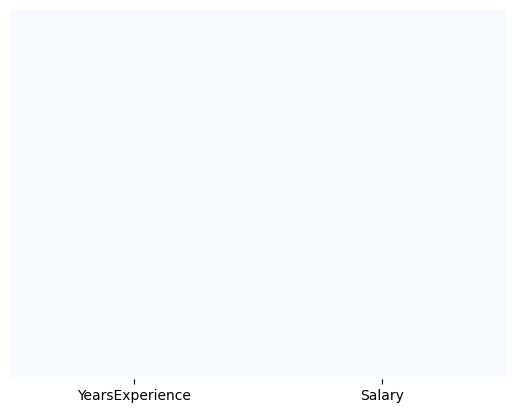

In [4]:
# check if there are any Null values
sns.heatmap(salary_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [5]:
# Check the dataframe info

salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


In [6]:
# Statistical summary of the dataframe

salary_df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


MINI CHALLENGE
 - What are the number of years of experience corresponding to employees with minimum and maximim salaries?

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

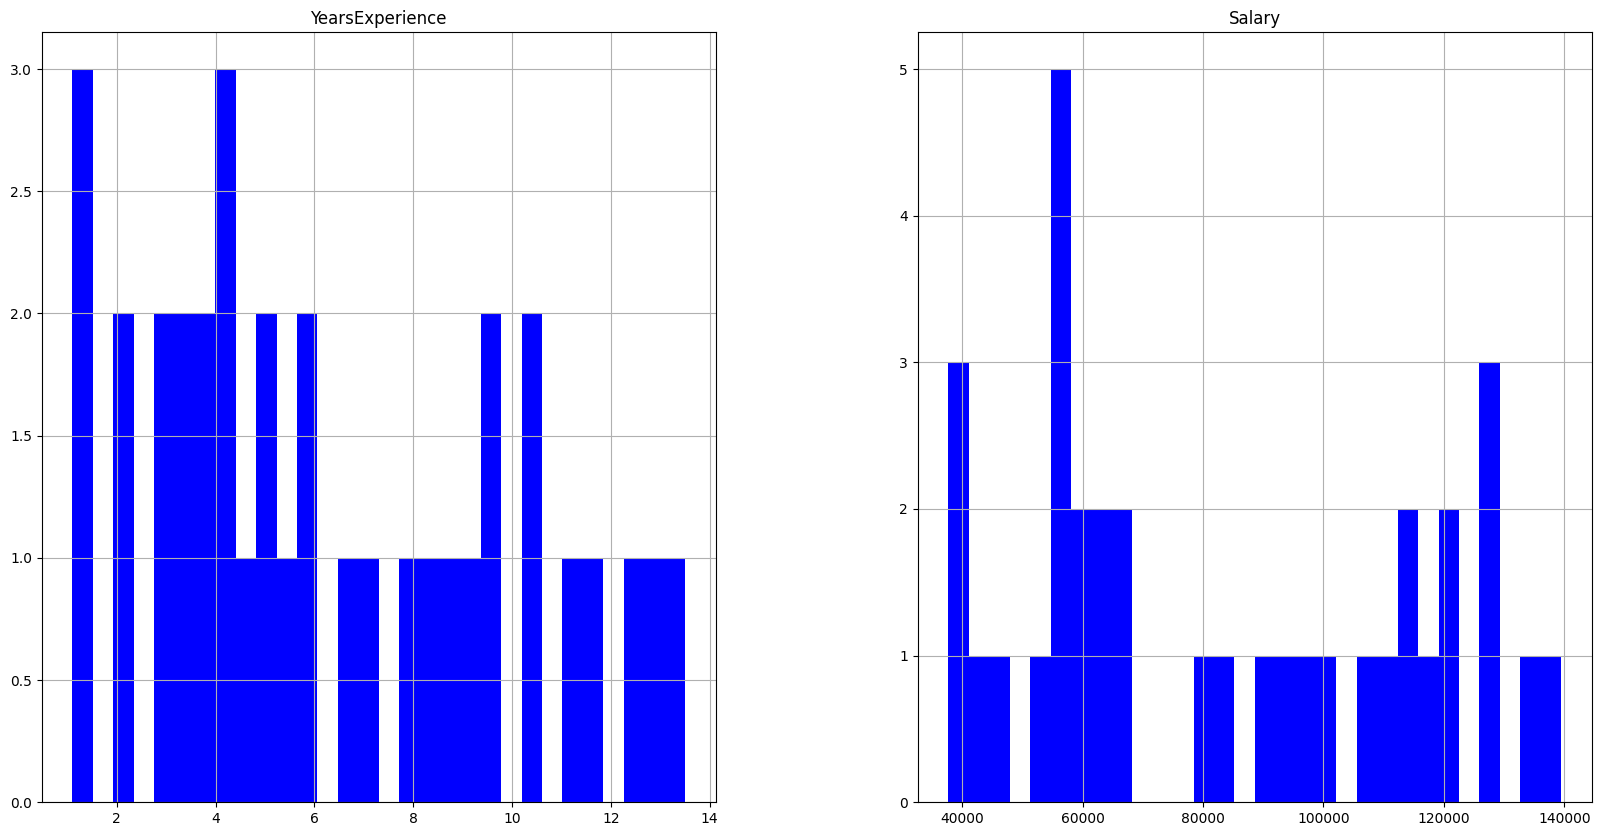

In [7]:
salary_df.hist(bins = 30, figsize = (20,10), color = 'b')


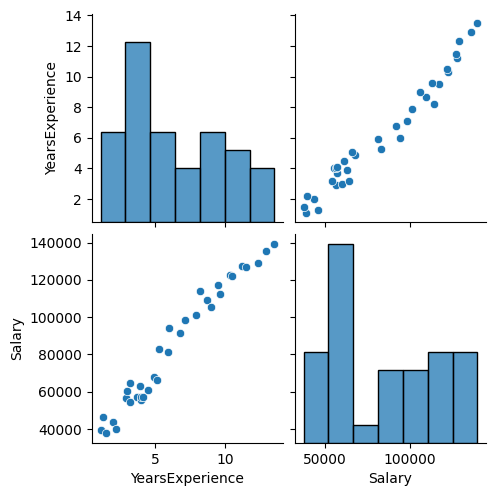

In [8]:
# plot pairplot

sns.pairplot(salary_df)

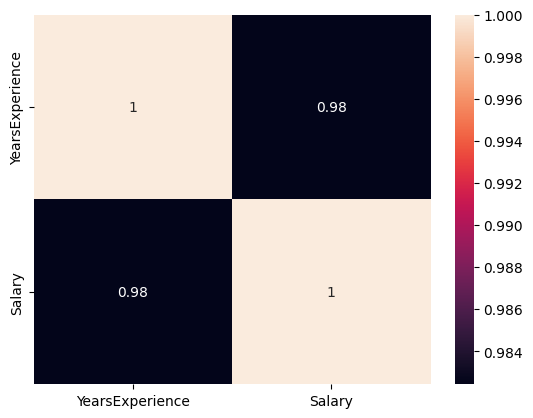

In [9]:
corr_matrix = salary_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

MINI CHALLENGE
- Use regplot in Seaborn to obtain a straight line fit between "salary" and "years of experience"

# TASK #4: CREATE TRAINING AND TESTING DATASET

In [9]:
X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]


In [11]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [12]:
y.head()

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891


In [13]:
X.shape

(35, 1)

In [14]:
y.shape

(35, 1)

In [10]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [16]:
# Only take the numerical variables and scale them
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]], dtype=float32)

In [11]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


MINI CHALLENGE
 - Try splitting the data into 75% for training and the rest for testing
 - Verify that the split was successful by obtaining the shape of both X_train and X_test
 - Did you notice any change in the order of the data? why?

# TASK #5: TRAIN A LINEAR REGRESSION MODEL IN SK-LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [12]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [13]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.969661295413971

In [14]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[8788.461]]
Linear Model Coefficient (b):  [28368.043]


MINI CHALLENGE
- Retrain the model while setting the fit_intercept = False, what do you notice?

# TASK #6: EVALUATE TRAINED MODEL PERFORMANCE (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [15]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [22]:
y_predict

array([[104980.34 ],
       [ 55183.64 ],
       [ 49173.695],
       [107556.04 ],
       [ 80940.56 ],
       [ 62052.152],
       [ 68920.664]], dtype=float32)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

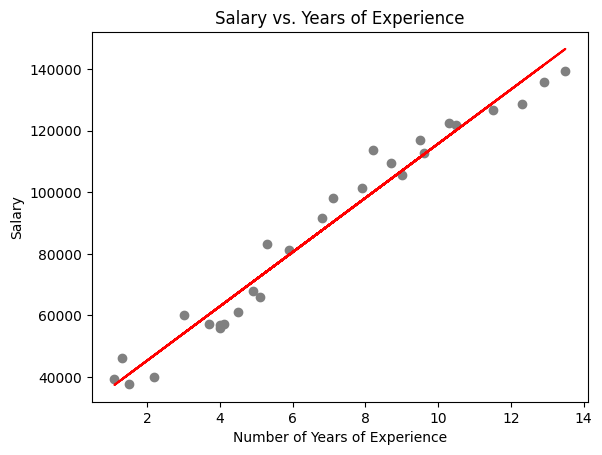

In [10]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regresssion_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary vs. Years of Experience')

MINI CHALLENGE
 - Use the trained model, obtain the salary corresponding to eployees who have years of experience = 5

# TASK #7: TRAIN A LINEAR LEARNER MODEL USING SAGEMAKER

In [24]:
!pip install sagemaker -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.3/404.3 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━

In [2]:
!pip install aws configure
!pip install awscli

In [3]:
!aws configure set default.region us-east-1
!aws configure set aws_access_key_id ''
!aws configure set aws_secret_access_key ''


In [4]:
!aws s3 ls

2025-01-12 03:19:58 flink-demo-651706775874-us-east-1-1736651925419-bucket
2025-01-11 16:07:37 sagemaker-studio-651706775874-ai3vc7ntht6
2025-01-11 16:07:42 sagemaker-studio-651706775874-u4zrpqz4f5
2025-01-11 16:07:41 sagemaker-us-east-1-651706775874


In [5]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2
import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket()
# Let's define the S3 bucket and prefix that we want to use in this session
# bucket = 'sagemaker-practica' # bucket named 'sagemaker-practical' was created beforehand
prefix = 'linear_learner' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance.
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3).
try:
    # Works when running this code in SageMaker notebook instance
    role = sagemaker.get_execution_role()
except ValueError:
    # Works when running this code locally
    session_boto = boto3.Session(profile_name="default")
    iam = session_boto.client("iam")
    # Fetch the IAM role created by SageMaker
    role = [
        r
        for r in iam.list_roles()["Roles"]
        if r["RoleName"].startswith("AmazonSageMaker-ExecutionRole")
    ][0]["Arn"]

print(role)

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_fields.py:192: UserWarning: Field name "json" in "MonitoringDatasetFormat" shadows an attribute in parent "Base"
  warnings.warn(


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


arn:aws:iam::651706775874:role/service-role/AmazonSageMaker-ExecutionRole-20250111T213723


In [16]:
X_train.shape

(28, 1)

In [17]:
y_train = y_train[:,0]

In [18]:
y_train.shape

(28,)

In [19]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O).
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0)
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero


0

In [20]:
import os

# Code to upload RecordIO data to S3

# Key refers to the name of the file
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-us-east-1-651706775874/linear_learner/train/linear-train-data


In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [21]:
# Make sure that the target label is a vector
y_test = y_test[:,0]


In [22]:
# Code to upload RecordIO data to S3

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_test, y_test)
buf.seek(0)
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero


0

In [23]:
# Key refers to the name of the file
key = 'linear-test-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)

# Let's print out the testing data location in s3
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_test_data))

uploaded training data location: s3://sagemaker-us-east-1-651706775874/linear_learner/test/linear-test-data


In [24]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-us-east-1-651706775874/linear_learner/output


In [25]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the linearLearner container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [26]:
container

'382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner:1'

In [27]:
# We have pass in the container, the type of instance that we would like to use for training
# output path and sagemaker session into the Estimator.
# We can also specify how many instances we would like to use for training
# sagemaker_session = sagemaker.Session()

linear = sagemaker.estimator.Estimator(container,
                                       role,
                                       train_instance_count = 1,
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 1,
                           predictor_type = 'regressor',
                           mini_batch_size = 5,
                           epochs = 5,
                           num_models = 32,
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


2025-01-26 15:44:48 Starting - Starting the training job......
2025-01-26 15:45:40 Starting - Preparing the instances for training...
2025-01-26 15:46:02 Downloading - Downloading input data...
2025-01-26 15:46:33 Downloading - Downloading the training image........
2025-01-26 15:48:19 Training - Training image download completed. Training in progress.
2025-01-26 15:48:19 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[01/26/2025 15:48:12 INFO 140623052531520] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', '

MINI CHALLENGE
- Try to train the model with more epochs and additional number of models
- Can you try to reduce the cost of billable seconds?

# TASK #8: DEPLOY AND TEST THE TRAINED LINEAR LEARNER MODEL

In [28]:
# Deploying the model to perform inference

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

-------!

In [29]:
!pip install --upgrade sagemaker -q

In [30]:
#from sagemaker.predictor import  json_deserializer
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer
# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

# linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = CSVSerializer()
#linear_regressor.serializer = csv_serializer
#linear_regressor.deserializer = json_deserializer
linear_regressor.deserializer = JSONDeserializer()

In [31]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

In [32]:
result # results are in Json format

{'predictions': [{'score': 120807.109375},
  {'score': 151942.6875},
  {'score': 97455.421875},
  {'score': 86752.5625},
  {'score': 89671.5234375},
  {'score': 70211.78125},
  {'score': 31292.302734375}]}

In [33]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [34]:
predictions

array([120807.109375  , 151942.6875    ,  97455.421875  ,  86752.5625    ,
        89671.5234375 ,  70211.78125   ,  31292.30273438])

In [35]:
predictions.shape

(7,)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

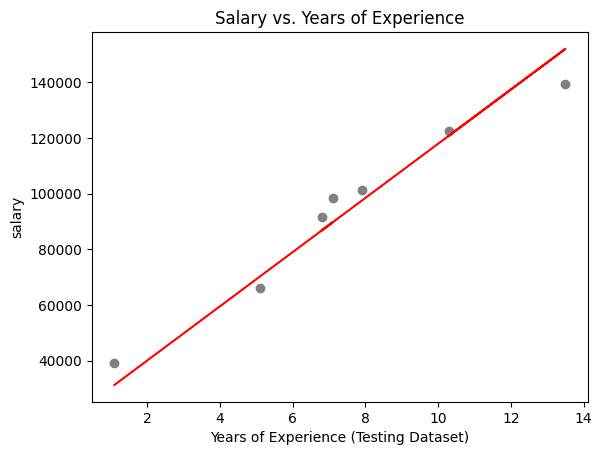

In [36]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, predictions, color = 'red')
plt.xlabel('Years of Experience (Testing Dataset)')
plt.ylabel('salary')
plt.title('Salary vs. Years of Experience')

In [41]:
# Delete the end-point

linear_regressor.delete_endpoint()

# EXCELLENT JOB! NOW YOU'RE FAMILIAR WITH SAGEMAKER LINEAR LEARNER, YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS

In [40]:
import requests
import json

# API Gateway URL
api_url = "https://hq2mcqxrwi.execute-api.us-east-1.amazonaws.com/prod/predict"

# Input Data
input_data = {"YearsExperience": 5.0}

# Headers
headers = {"Content-Type": "application/json"}

# Make POST Request
response = requests.post(api_url, data=json.dumps(input_data), headers=headers)

# Handle Response
if response.status_code == 200:
    print("Prediction:", response.json())
else:
    print(f"Error: {response.status_code}, {response.text}")


Prediction: {'statusCode': 200, 'body': '{"YearsExperience": 5.0, "PredictedSalary": 69238.796875}'}
